In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [4]:
# 加载iris数据集，存储花瓣的长度作为目标值
iris = datasets.load_iris()
# print(iris.data)
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

In [5]:
sess = tf.Session()

In [6]:
# 使得返回结果可以复现
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [7]:
# 划分训练集和测试集80%和20%，下面的方法是应该学会的。
train_indices = np.random.choice(len(x_vals), round(0.8*len(x_vals)), replace=False)
#print(train_indices)
#print(list(set(range(len(x_vals)))-set(train_indices)))
# range(len(x_vals))=(0,150) set(range(len(x_vals))是0到149的集合 ，而集合能相互加减，
# 在前面加上list就转换成列表,在前面在加上np.array()转换成数组。
test_indices = np.array(list(set(range(len(x_vals)))-set(train_indices)))
#print(test_indices)

In [8]:
x_vals_train = x_vals[train_indices]
x_vals_test  = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test  = y_vals[test_indices]
# 下面是做归一化
def normalize_cols(m):
    col_max = m.max(axis=0)  # 取每一列的最大值
    col_min = m.min(axis=0)
    return (m - col_min)/(col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test  = np.nan_to_num(normalize_cols(x_vals_test))
# nan_to_num()可用来将nan替换成0
# print(y_vals_train)

In [9]:
batch_size = 50
x_data = tf.placeholder(tf.float32, shape=[None, 3])
y_target = tf.placeholder(tf.float32, shape=[None, 1])

In [10]:
hidden_layer_nodes = 10  # 设置五个隐藏节点
W1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes]))  # W1.shape = (3, 5)
b1 = tf.Variable(tf.random_normal(shape=[1, hidden_layer_nodes]))  # b1.shape = (1, 5) 
W2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))  # W2.shape = (5, 1)
b2 = tf.Variable(tf.random_normal(shape=[1]))
# x_data*W1 + b1 (None, 5)
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, W1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, W2), b2))

In [11]:
# 定义损失函数
loss = tf.reduce_mean(tf.square(final_output - y_target))
# 定义优化算法，初始化所有的变量
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [12]:
# 遍历迭代训练模型
loss_train = []  # 初始化list存储训练损失
loss_test = []
for i in range(10000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_train.append(np.sqrt(temp_loss))
    
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    loss_test.append(np.sqrt(test_temp_loss))
    if (i+1) % 200 == 0:
        print('Generation: ' + str(i+1) + '. Loss= ' + str(temp_loss))

Generation: 200. Loss= 0.489015


Generation: 400. Loss= 0.17826


Generation: 600. Loss= 0.249285


Generation: 800. Loss= 0.0876496


Generation: 1000. Loss= 0.215284


Generation: 1200. Loss= 0.115618


Generation: 1400. Loss= 0.0879171


Generation: 1600. Loss= 0.229014


Generation: 1800. Loss= 0.156136


Generation: 2000. Loss= 0.158162


Generation: 2200. Loss= 0.110649


Generation: 2400. Loss= 0.134223


Generation: 2600. Loss= 0.111522


Generation: 2800. Loss= 0.140492


Generation: 3000. Loss= 0.116851


Generation: 3200. Loss= 0.0928779


Generation: 3400. Loss= 0.0983613


Generation: 3600. Loss= 0.1321


Generation: 3800. Loss= 0.118192


Generation: 4000. Loss= 0.0643001


Generation: 4200. Loss= 0.0663173


Generation: 4400. Loss= 0.117492


Generation: 4600. Loss= 0.138703


Generation: 4800. Loss= 0.0660831


Generation: 5000. Loss= 0.102388


Generation: 5200. Loss= 0.0893969


Generation: 5400. Loss= 0.0681611


Generation: 5600. Loss= 0.0919217


Generation: 5800. Loss= 0.0732473


Generation: 6000. Loss= 0.0619192


Generation: 6200. Loss= 0.0723059


Generation: 6400. Loss= 0.0847965


Generation: 6600. Loss= 0.0846924


Generation: 6800. Loss= 0.0879359


Generation: 7000. Loss= 0.0651959


Generation: 7200. Loss= 0.0790017


Generation: 7400. Loss= 0.0796359


Generation: 7600. Loss= 0.114031


Generation: 7800. Loss= 0.066119


Generation: 8000. Loss= 0.0901915


Generation: 8200. Loss= 0.0765839


Generation: 8400. Loss= 0.0744656


Generation: 8600. Loss= 0.0768906


Generation: 8800. Loss= 0.0719919


Generation: 9000. Loss= 0.0746542


Generation: 9200. Loss= 0.0882509


Generation: 9400. Loss= 0.081888


Generation: 9600. Loss= 0.0746554


Generation: 9800. Loss= 0.0515915


Generation: 10000. Loss= 0.0811114


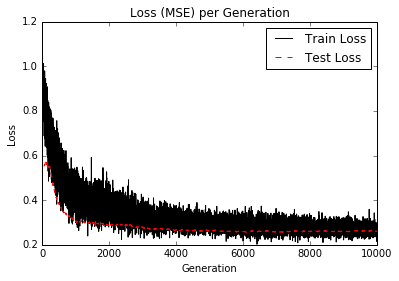

In [13]:
%matplotlib inline
# Plot loss (MSE) over time
plt.plot(loss_train, 'k-', label='Train Loss')
plt.plot(loss_test, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()